# Aprensentação

A introdução de sistemas de pagamento online tem ajudado muito na facilidade de pagamentos. Mas, ao mesmo tempo, aumentou em fraudes de pagamento(payment fraud). Fraudes de pagamentos online podem acontecer com qualquer pessoa que use qualquer sistema de pagamento, especialmente ao fazer pagamentos com cartão de crédito.
É por isso que detectar fraudes em pagamentos online é muito importante para as empresas de cartão de crédito para garantir que os clientes não sejam cobrados pelos produtos e serviços que nunca pagaram.

# Usando Machine Learning

Para identificar fraudes de pagamento online com aprendizado de máquina, precisamos treinar um modelo de aprendizado de máquina para classificar pagamentos fraudulentos e não fraudulentos. Para isso, precisamos de um conjunto de dados contendo informações sobre fraudes em pagamentos online, para que possamos entender que tipo de transações levam à fraude. Para esta tarefa, foi coletado um conjunto de dados do Kaggle, que contém informações históricas sobre transações fraudulentas que podem ser usadas para detectar fraudes em pagamentos online.

# Importações

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
data = pd.read_csv("data/credit_card.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Valores nulos

Agora, vamos ver se esse conjunto de dados tem valores nulos ou não:

In [3]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Tipos de transação

Portanto, esse conjunto de dados não possui valores nulos. Antes de avançar, agora, vamos dar uma olhada no tipo de transação mencionado no conjunto de dados

In [4]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

# Grafico da distribuição das transações

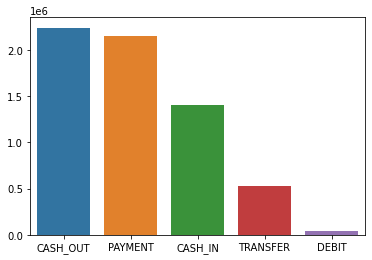

In [24]:
type_count = data["type"].value_counts()
quantity = type_count.values
transactions = type_count.index

sns.barplot(x=transactions, y=quantity);

# Correlação dos dados com a coluna isFraud

Agora vamos dar uma olhada na correlação entre os recursos dos dados com a coluna isFraud:

In [6]:
correlation = data.corr()
correlation["isFraud"].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

# Transform nos dados

Transformar os categorical features em numeros e transformar os valores da coluna isFruad em "no fruad" e "fraud"

In [7]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})

data["isFraud"] = data["isFraud"].map({0:"No Fraud", 1:"Fraud"})

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


# Divisão dos dados em conjuto de test e treino

In [8]:
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criação e treino do modelo

In [9]:
modelo = DecisionTreeClassifier()
modelo.fit(x_train, y_train)

DecisionTreeClassifier()

# Precisão do modelo

In [10]:
y_pred = modelo.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100

print(f"Precisão do modelo: {round(score, 2)}%")

Precisão do modelo: 99.97%


In [11]:
# predição
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(modelo.predict(features))

['Fraud']


# Precisão dos dados pela matriz de confusão

In [12]:
confusion_matrix(y_test, y_pred)

array([[   1428,     192],
       [    178, 1270726]])

# Referencias
- https://thecleverprogrammer.com/2022/02/22/online-payments-fraud-detection-with-machine-learning/
- https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
- https://scikit-learn.org/stable/